In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

twodbn = gum.BayesNet('AV')

v0 =gum.RangeVariable('vel0','velocity in [-300 300]',0,9)
vt = gum.RangeVariable('velt','velocityt in [-300 300]',0,9)

a0 =gum.RangeVariable('accel0','acceleration in [-300 300]',0,9)
at =gum.RangeVariable('accelt','accelerationt in [-300 300]',0,9)

phi0 =gum.RangeVariable('phi0','phi in [-300 300]',0,9)
phit =gum.RangeVariable('phit','phit in [-300 300]',0,9)

accelcmd0 =gum.RangeVariable('accelcmd0','accelcmd in [-300 300]',0,9)
accelcmdt =gum.RangeVariable('accelcmdt','accelcmdt in [-300 300]',0,9)

decelcmd0 =gum.RangeVariable('decelcmd0','decelcmd in [-300 300]',0,9)
decelcmdt =gum.RangeVariable('decelcmdt','decelcmdt in [-300 300]',0,9)

steercmd0 =gum.RangeVariable('steercmd0','steercmd in [-300 300]',0,9)
steercmdt =gum.RangeVariable('steercmdt','steercmdt in [-300 300]',0,9)

In [2]:
print(v0)
print(a0)
print(phi0)
print(accelcmd0)
print(steercmd0)

twodbn.add(v0) # 0
twodbn.add(vt) # 1

twodbn.add(a0) # 2
twodbn.add(at) # 3

twodbn.add(phi0) # 4
twodbn.add(phit) # 5 

twodbn.add(accelcmd0) # 6
twodbn.add(accelcmdt) # 7
 
twodbn.add(steercmd0) # 8
twodbn.add(steercmdt) # 9

twodbn.add(decelcmd0) # 10
twodbn.add(decelcmdt) # 11

vel0[0,9]
accel0[0,9]
phi0[0,9]
accelcmd0[0,9]
steercmd0[0,9]


11

In [3]:
twodbn.nodes()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

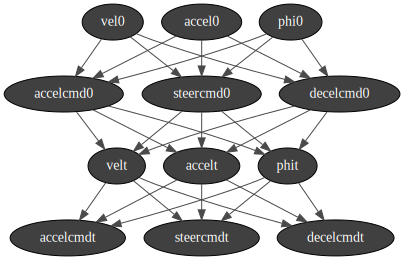

In [4]:
twodbn.addArc(0,6)
twodbn.addArc(0,8)
twodbn.addArc(0,10)

twodbn.addArc(2,6)
twodbn.addArc(2,8)
twodbn.addArc(2,10)

twodbn.addArc(4,6)
twodbn.addArc(4,8)
twodbn.addArc(4,10)

twodbn.addArc(6,1)
twodbn.addArc(6,3)
twodbn.addArc(6,5)
twodbn.addArc(8,1)
twodbn.addArc(8,3)
twodbn.addArc(8,5)
twodbn.addArc(10,1)
twodbn.addArc(10,3)
twodbn.addArc(10,5)


twodbn.addArc(1,7)
twodbn.addArc(1,9)
twodbn.addArc(1,11)


twodbn.addArc(3,7)
twodbn.addArc(3,9)
twodbn.addArc(3,11)


twodbn.addArc(5,7)
twodbn.addArc(5,9)
twodbn.addArc(5,11)

# twodbn.addArc('phi0','accelcmd0')
# twodbn.addArc('phi0','steercmd0')
# twodbn.addArc('accel0','accelcmd0')
# twodbn.addArc('accel0','steercmd0')
# twodbn.addArc('vel0','accelcmd0')
# twodbn.addArc('vel0','steercmd0')

# twodbn.addArc('steercmd0','phit')
# twodbn.addArc('steercmd0','accelerationt')
# twodbn.addArc('steercmd0','velocityt')
# twodbn.addArc('accelcmd0','phit')
# twodbn.addArc('accelcmd0','accelerationt')
# twodbn.addArc('accelcmd0','velocityt')
                           
# twodbn.addArc('phit','accelcmdt')
# twodbn.addArc('phit''steercmdt')
# twodbn.addArc('accelerationt','accelcmdt')
# twodbn.addArc('accelerationt','steercmdt')
# twodbn.addArc('velocityt','accelcmdt')
# twodbn.addArc('velocityt','steercmdt')                                    
                           
# twodbn.generateCPTs()
gnb.showBN(twodbn, size="100")

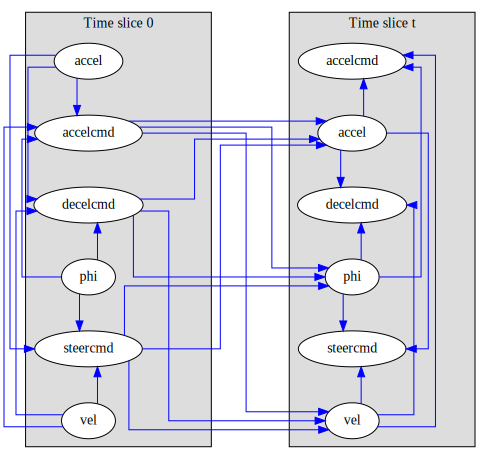

In [5]:
gdyn.showTimeSlices(twodbn,size="100")

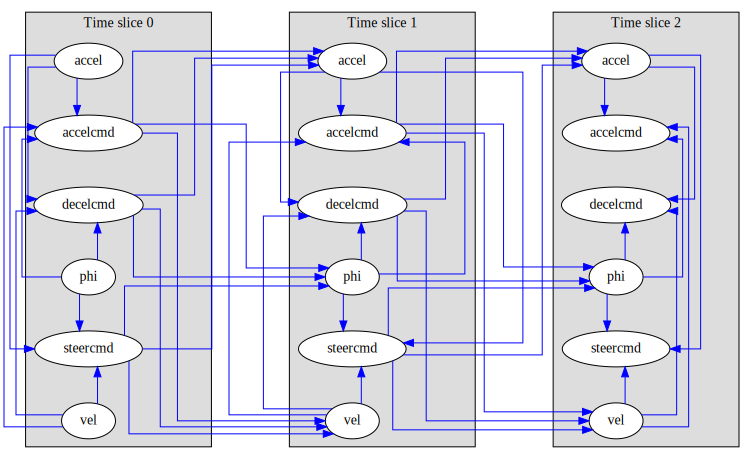

In [6]:
T=3

dbn=gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn,size="100")

In [7]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd
import numpy as np
import os

import pyAgrum.lib.explain as explain


df = pd.read_csv('/home/minu/shared_dir/minu/out/ADS.csv')

gum.generateCSV(dbn,"out/sample_ads.csv",5000,True)

print(df)


 out/sample_ads.csv : [ ###################################################### ] 100%
Log2-Likelihood : -inf
      accelcmd1  accelcmd0  steercmd1  phi2  decelcmd1  accel1  vel2  vel1  \
0             0          4          0     5          8       0     6     9   
1             0          4          0     6          8       0     7     9   
2             0          4          0     7          8       0     8     9   
3             0          4          0     8          8       0     9     9   
4             0          4          0     9          8       0     0     9   
...         ...        ...        ...   ...        ...     ...   ...   ...   
4574          0          5          0     5          0       0     5     0   
4575          0          5          0     5          0       0     5     0   
4576          0          5          0     5          0       0     5     0   
4577          0          5          0     5          0       0     5     0   
4578          0          5       

In [8]:
with open("out/sample_ads.csv","r") as src:
    for _ in range(10):
        print(src.readline(),end="")

accelcmd1,vel1,decelcmd0,accelcmd2,accel0,phi0,steercmd1,accelcmd0,accel1,steercmd0,vel2,accel2,vel0,decelcmd1,phi1,steercmd2,decelcmd2,phi2
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [9]:
learner=gum.BNLearner('/home/minu/shared_dir/minu/out/ADS.csv',dbn) #using bn as template for variables

In [10]:
import matplotlib.pyplot as plt
import numpy as np

learner.useEM(1e-10)
learner.useAprioriSmoothing()
print(learner)
learner.setVerbosity(True)
learner.setMaxIter(100)

bn=learner.learnParameters(dbn.dag())

print(f"# iterations : {learner.nbrIterations()}")
print("Learned in {0}ms".format(1000*learner.currentTime()))

# plt.plot(np.arange(1,1+learner.nbrIterations()),learner.history())
# plt.xticks(np.arange(1, 1+learner.nbrIterations(), step=2))
# plt.title("Error during EM iterations");

<pyAgrum.pyAgrum.BNLearner; proxy of <Swig Object of type 'gum::learning::BNLearner< double > *' at 0x7f567ed16870> >
# iterations : 2
Learned in 35.040681ms


In [11]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
print(ie.posterior(bn.idFromName("vel2")))

<vel2:0> :: 0.0762009 /<vel2:1> :: 0.0761485 /<vel2:2> :: 0.0762012 /<vel2:3> :: 0.0803977 /<vel2:4> :: 0.0827853 /<vel2:5> :: 0.266675 /<vel2:6> :: 0.112936 /<vel2:7> :: 0.0762009 /<vel2:8> :: 0.0762009 /<vel2:9> :: 0.0762533


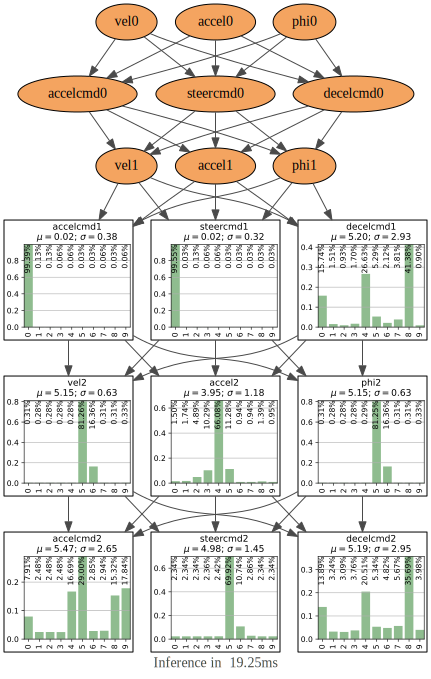

In [12]:
gnb.showInference(bn,
                  evs={
                      "vel0":5, "accel0":5, "phi0":0,
                      "accelcmd0":3, "steercmd0": 3, "vel1": 0,
                      "accel1":0, "phi1": 0, "decelcmd0" :5 }, #"decelcmd1" :4 "steercmd1": 3 'accelcmd1': 2,
                  targets={'decelcmd1','steercmd1','accelcmd1','vel2','accel2','phi2',
                          'accelcmd2','steercmd2','decelcmd2'},
                  size = '10000')